In [3]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# 1) Зниження розмірності та візуалізація даних
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
# Завантаження датасету з Kaggle
path = kagglehub.dataset_download("l3llff/banana")

# Читаємо правильний файл
df = pd.read_csv(f"{path}/banana_quality.csv")

print(df.sample(5).T, "\n")
print(f"List of column names:", df.columns, "\n")

Using Colab cache for faster access to the 'banana' dataset.
                 4473      7957      7024      1000      637 
Size         2.557487  -0.88282  2.019043 -1.325473 -0.040586
Weight       -2.76533 -1.486103 -5.184596  1.512126  1.229818
Sweetness   -0.745814 -2.142685 -4.584646 -0.614516   2.02827
Softness    -0.043452  1.526686  0.547967 -2.308078 -0.494037
HarvestTime  1.254959 -2.221124 -1.325294 -1.155198 -1.601531
Ripeness     3.330244 -1.481664 -4.350498  2.478848  0.500556
Acidity     -1.767989  1.099004  0.895662  2.193427 -0.910936
Quality          Good       Bad       Bad      Good      Good 

List of column names: Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object') 



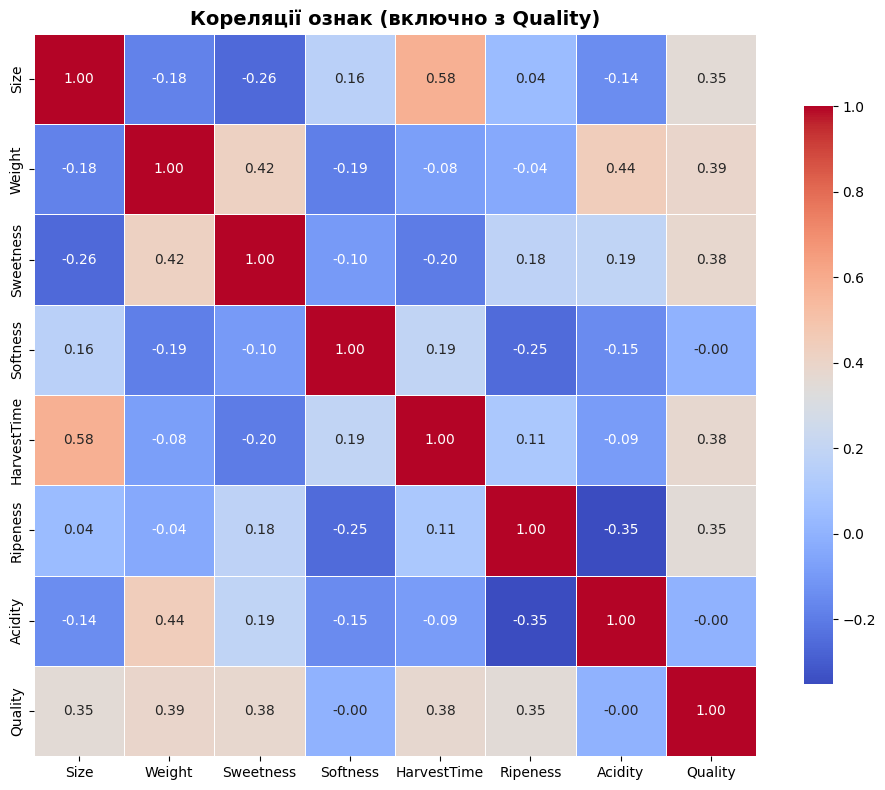

In [6]:
# --------------------------
# Heatmap кореляцій
# --------------------------
# Конвертуємо Quality в числовий формат
df_encoded = df.copy()
if df_encoded['Quality'].dtype == 'object':
    # Якщо Quality категоріальна (наприклад, 'good', 'bad'), кодуємо її
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df_encoded['Quality'] = le.fit_transform(df_encoded['Quality'])

plt.figure(figsize=(10, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Кореляції ознак (включно з Quality)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [7]:
# 1) Вибираємо ознаки та ціль
feature_cols = df.columns[:-1]   # всі колонки, крім останньої (Quality)
target_col = df.columns[-1]      # остання колонка = ціль

X = df[feature_cols]  # ознаки
y = df[target_col]    # цільова змінна

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2) Нормалізація
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Перетворимо назад у DataFrame для зручності
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

# 4) Додаємо колонку target
X_scaled_df[target_col] = y_encoded

# 5) Перевірка
print("Перші 5 рядків нормалізованого датасету:")
print(X_scaled_df.head())


Перші 5 рядків нормалізованого датасету:
       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -0.551136  0.609729   1.975051 -0.705896     0.523951  0.782568  0.114491   
1 -0.778107  0.619052   0.573385 -1.201237    -0.070585  0.608493  0.130204   
2  0.182685  1.113298   1.200347 -1.273895     0.052101  1.092419  0.618577   
3 -0.056521  1.154485   1.365182 -0.609815    -0.127716  0.516472  0.204566   
4  0.655290  1.031953   0.383797 -0.578798    -0.340291  0.140598  1.222556   

   Quality  
0        1  
1        1  
2        1  
3        1  
4        1  


In [8]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

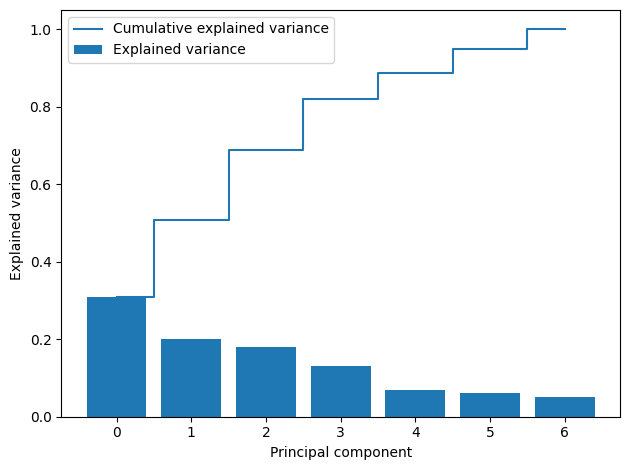

In [9]:
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [10]:
#Кожен стовпець показує, яку частку загальної дисперсії у вихідних даних пояснює кожна окрема головна компонента (PC).
#Лінія показує загальну частку дисперсії, що пояснюється першими N компонентами

,PCA_1,PCA_2,Quality
7651,-1.237675,-1.028413,Bad
545,-1.242540,1.574072,Good
3993,0.383748,1.006153,Bad
5037,2.020486,-0.338184,Good
2298,0.924538,1.027719,Bad


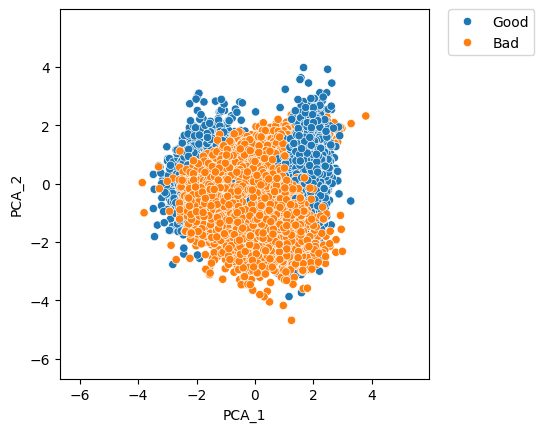

In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_result_df = pd.DataFrame({'PCA_1': pca_result[:, 0], 'PCA_2': pca_result[:, 1], 'Quality': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Quality', data=pca_result_df, ax=ax)
lim = (pca_result.min() - 2, pca_result.max() + 2)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

pca_result_df.sample(5)

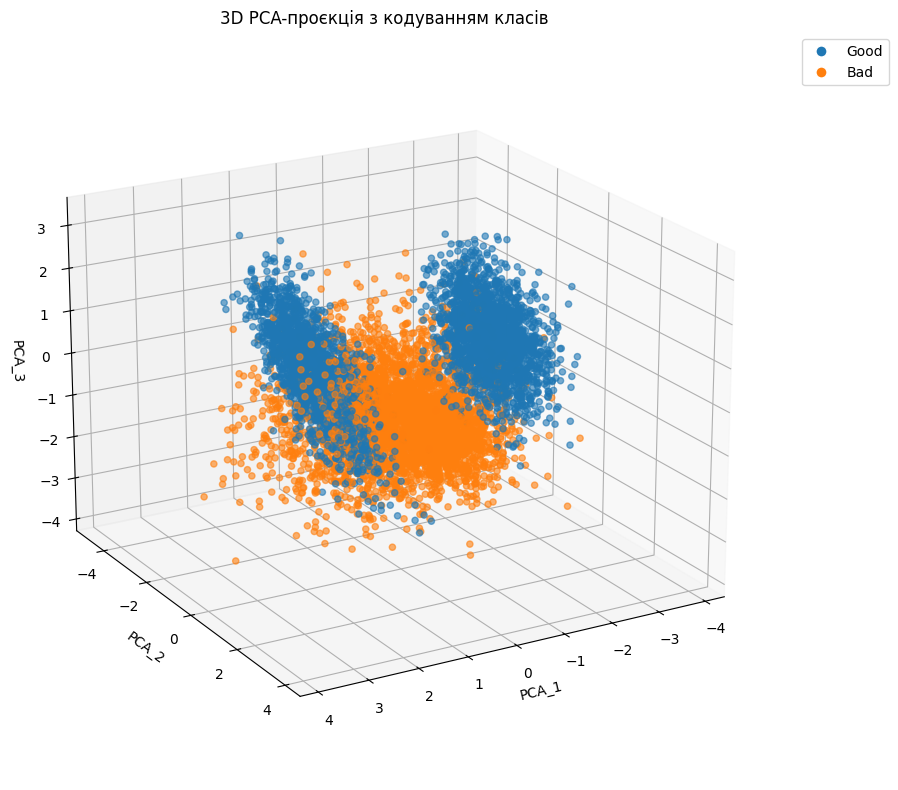

In [12]:
from mpl_toolkits.mplot3d import Axes3D



# --- 1. Виконання PCA до 3-х компонент ---
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(X_scaled)

# 2. Створення DataFrame для візуалізації
pca_result_df_3d = pd.DataFrame({
    'PCA_1': pca_result_3d[:, 0],
    'PCA_2': pca_result_3d[:, 1],
    'PCA_3': pca_result_3d[:, 2],
    'Quality_Encoded': y_encoded,
    'Quality': le.inverse_transform(y_encoded) # Повертаємо оригінальні мітки для легенди
})

# --- 3. Побудова 3D-графіка ---

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визначаємо колірну палітру
palette = {'Good': sns.color_palette()[0], 'Bad': sns.color_palette()[1]}

# Малюємо точки
scatter = ax.scatter(
    pca_result_df_3d['PCA_1'],
    pca_result_df_3d['PCA_2'],
    pca_result_df_3d['PCA_3'],
    c=pca_result_df_3d['Quality'].map(palette),

    alpha=0.6, # Прозорість точок для кращого бачення перекриття
)

# Налаштування осей
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
ax.set_title('3D PCA-проєкція з кодуванням класів')

# === Змінений кут огляду ===
ax.view_init(elev=20, azim=60) # Встановлюємо кут нахилу та повороту
# ===========================

# Додавання легенди
# Створюємо фіктивні об'єкти для легенди
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Good',
               markersize=8, markerfacecolor=palette['Good']),
    plt.Line2D([0], [0], marker='o', color='w', label='Bad',
               markersize=8, markerfacecolor=palette['Bad'])
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))


plt.tight_layout() # Для кращого розміщення елементів
plt.show()

,tsne_1,tsne_2,Quality
7247,-3.490790,-69.305023,Bad
6346,-19.471468,-36.198555,Bad
1327,-63.045052,-18.243622,Good
7762,11.863307,-44.994961,Bad
899,-82.014465,3.383228,Good


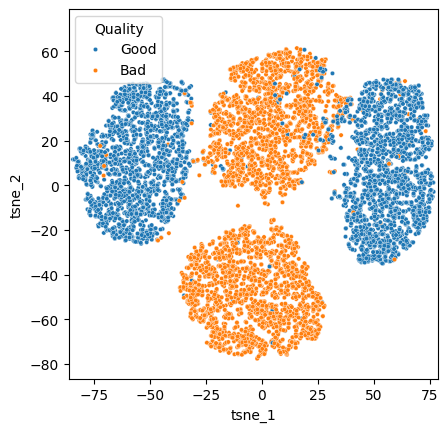

In [13]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_scaled)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'Quality': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Quality', data=tsne_result_df, ax=ax, s=10)
lim = (tsne_result.min() - 2, tsne_result.max() + 2)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

tsne_result_df.sample(5)

In [77]:
import time

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# --- 1. PCA з різною кількістю компонент ---
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

pca5 = PCA(n_components=5)
X_pca5 = pca5.fit_transform(X_scaled)

# --- 2. Налаштування експерименту ---
svm_classifier = SVC(C=1, gamma=1, kernel='rbf', random_state=42)

# Додаємо новий варіант у словник
datasets = {
    "Початковий": X_scaled,
    "PCA (2 компоненти)": X_pca2,
    "PCA (5 компонентів)": X_pca5
}

y = y_encoded
results = []

for name, data in datasets.items():
    print(f"\n--- Тестування на: {name} ---")

    # Розбиваємо дані однаково для всіх наборів
    X_train, X_test, y_train, y_test = train_test_split(
        data, y, test_size=0.2, random_state=42
    )

    # 1. Час навчання
    start_time = time.time()
    svm_classifier.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    # 2. Точність
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Час навчання: {train_time:.4f} сек")
    print(f"Точність на тесті: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # 3. Збереження результатів
    results.append({
        'Набір даних': name,
        'К-ть ознак': data.shape[1],
        'Час навчання (сек)': train_time,
        'Точність': accuracy
    })

# --- 4. Підсумкова таблиця ---
print("\n" + "="*40)
print("--- 📊 ПІДСУМКОВЕ ПОРІВНЯННЯ ---")
print("="*40)
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))



--- Тестування на: Початковий ---
Час навчання: 1.2492 сек
Точність на тесті: 0.9838
Classification Report:
              precision    recall  f1-score   support

         Bad       0.99      0.98      0.98       781
        Good       0.98      0.99      0.98       819

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


--- Тестування на: PCA (2 компоненти) ---
Час навчання: 0.7663 сек
Точність на тесті: 0.8494
Classification Report:
              precision    recall  f1-score   support

         Bad       0.90      0.78      0.84       781
        Good       0.81      0.91      0.86       819

    accuracy                           0.85      1600
   macro avg       0.86      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600


--- Тестування на: PCA (5 компонентів) ---
Час навчання: 0.3542 сек
Точність на тесті: 0.9694
Classification Report:
  

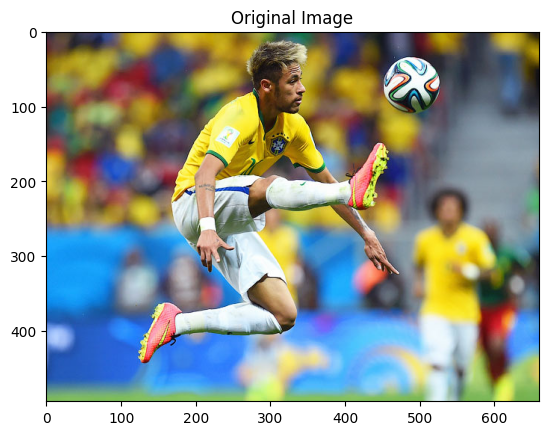

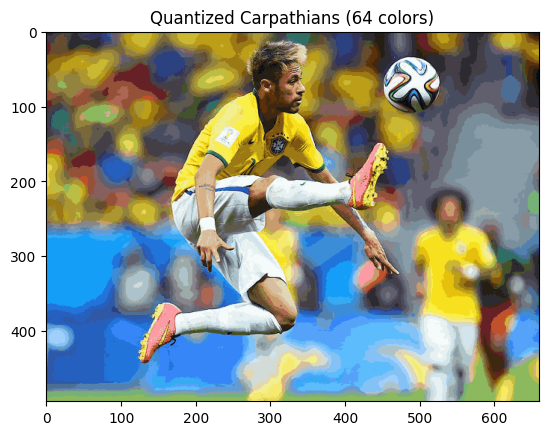

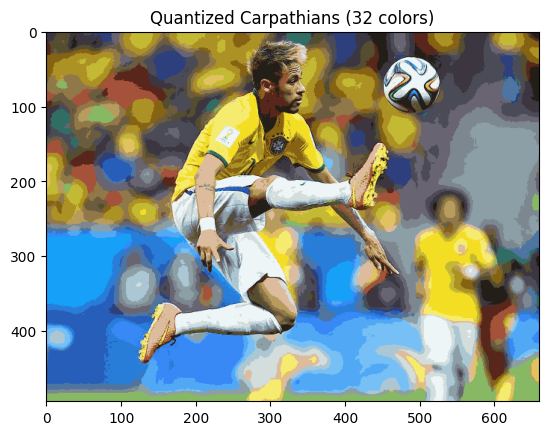

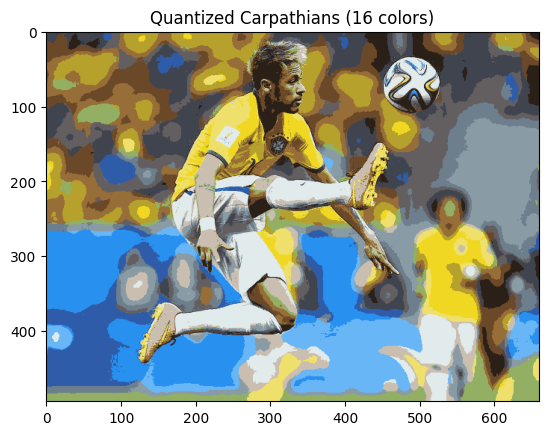

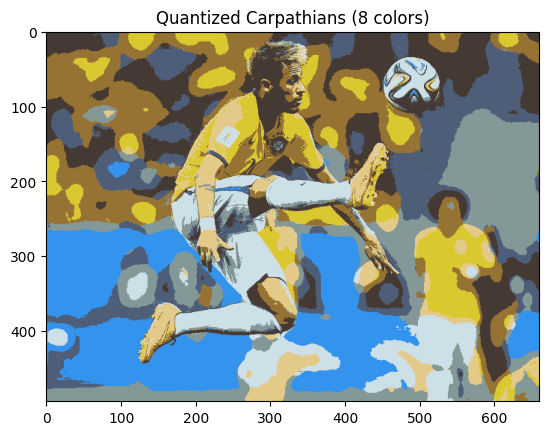

In [16]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage import io
from skimage.transform import resize
# Перетворити на числа з плаваючою точкою замість стандартного 8-бітного цілого кодування
image_photo = io.imread('https://sport.kg/uploads/posts/2014-10/1413346054_neymar-pyaterka.jpg')
image_array = np.array(image_photo, dtype=np.float64) / 255

# Відображення оригінального зображення
plt.imshow(image_photo)
plt.title("Original Image")
plt.show()

# Список кількостей кольорів для квантування
n_colors = [64, 32, 16, 8]

# Перетворення зображення у двовимірний масив для квантування
w, h, d = image_array.shape
image_data = np.reshape(image_array, (w * h, d))

for i in range(len(n_colors)):
    # Навчання моделі K-means на підмножині пікселів
    image_data_sample = shuffle(image_data, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors[i], random_state=0).fit(image_data_sample)

    # Прогнозування кольорів для всіх точок у повному зображенні
    label = kmeans.predict(image_data)

    plt.figure()
    plt.title(f"Quantized Carpathians ({n_colors[i]} colors)")
    plt.imshow(kmeans.cluster_centers_[label].reshape(w, h, -1))

In [46]:
# --- 1. Імпорт бібліотек ---
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import kagglehub

path = kagglehub.dataset_download("jackksoncsie/spam-email-dataset")

df = pd.read_csv(f"{path}/emails.csv")



df.head()




Using Colab cache for faster access to the 'spam-email-dataset' dataset.


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [44]:
from collections import Counter
Counter( df['spam'])
#1 - spam 0 - not spam


Counter({1: 1368, 0: 4360})

In [50]:

import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text(text):
    text = text.lower()
    text = re.sub(r"@\S+", " ", text)
    text = re.sub(r"https*\S+", " ", text)
    text = re.sub(r"#\S+", " ", text)
    text = re.sub(r"&quot", " ", text)
    text = re.sub(r"&\S+", " ", text)
    text = re.sub(r"â\S+", " ", text)
    text = re.sub(r"ð\S+", " ", text)
    text = re.sub(r"–", " ", text)
    text = re.sub(r"rt", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s{2,}', ' ', text)
    text = re.sub(r"\bsubject\b", " ", text)

    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text


df['text'] = df['text'].apply(clean_text)

df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new homes made easy im wanting sh...,1
3,color printing special request additional info...,1
4,money get software cds software compatibility ...,1


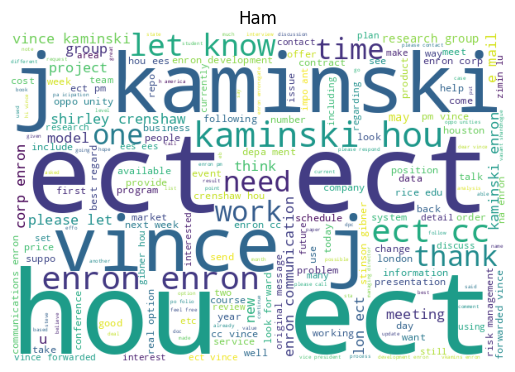

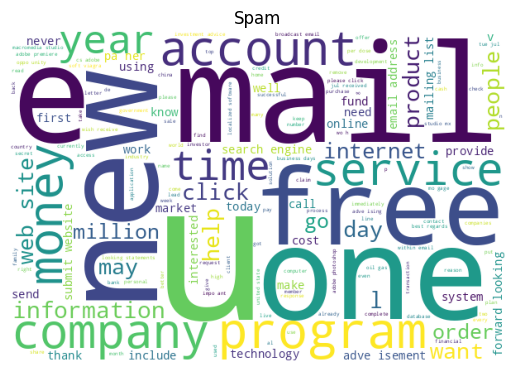

In [62]:
def visualize(spam):
    text = ''
    for msg in df[df['spam'] == spam]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.show()

plt.title("Ham"); plt.axis("off")
visualize(0)

plt.title("Spam"); plt.axis("off")
visualize(1)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.2)

In [80]:
tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train_vec, y_train)
nb_pred = nb.predict(X_test_vec)

print("=== Naive Bayes Results ===")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))


#  LOGISTIC REGRESSION

logreg = LogisticRegression()
logreg.fit(X_train_vec, y_train)
logreg_pred = logreg.predict(X_test_vec)

print("\n\n=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))


=== Naive Bayes Results ===
Accuracy: 0.9860383944153578
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       869
           1       1.00      0.95      0.97       277

    accuracy                           0.99      1146
   macro avg       0.99      0.97      0.98      1146
weighted avg       0.99      0.99      0.99      1146

[[868   1]
 [ 15 262]]


=== Logistic Regression Results ===
Accuracy: 0.9790575916230366
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       869
           1       0.99      0.92      0.96       277

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

[[867   2]
 [ 22 255]]
